In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
BACMET = pd.read_csv("/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/VIDO_ARETE/07042023_EcoliARETE_BACMET_Sum.csv")

In [3]:
BACMET

,row_0,Source,Outbreak,Phylogroup,Total_BACMET
0,EC_0012_1H1_D,Diseased,F0012,G,170
1,EC_0012_2H1_D,Diseased,F0012,G,168
2,EC_0012_2L1_D,Diseased,F0012,B2,168
3,EC_0012_3S1_D,Diseased,F0012,G,168
4,EC_0012_C1_H,Cecal,F0012,A,177
...,...,...,...,...,...
240,EC_E9DI_2_E,Environmental,NaN,A,169
241,EC_E9DN_1_E,Environmental,NaN,A,171
242,EC_E9DN_2_E,Environmental,NaN,A,171
243,EC_E9FP_1_E,Environmental,NaN,A,167


In [5]:
# Calculate the mean, maximum, and minimum values of the column with counts
mean_value = BACMET['Total_BACMET'].mean()
max_value = BACMET['Total_BACMET'].max()
min_value = BACMET['Total_BACMET'].min()

# Print the calculated values
print("Mean: ", mean_value)
print("Maximum: ", max_value)
print("Minimum: ", min_value)


Mean:  177.6204081632653
Maximum:  263
Minimum:  160


In [ ]:
#all features vs Source

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:4.055e-01 t=8.342e-01
Cecal vs. Environmental: t-test independent samples, P_val:1.126e-01 t=-1.596e+00
Diseased vs. Environmental: t-test independent samples, P_val:2.955e-01 t=-1.049e+00


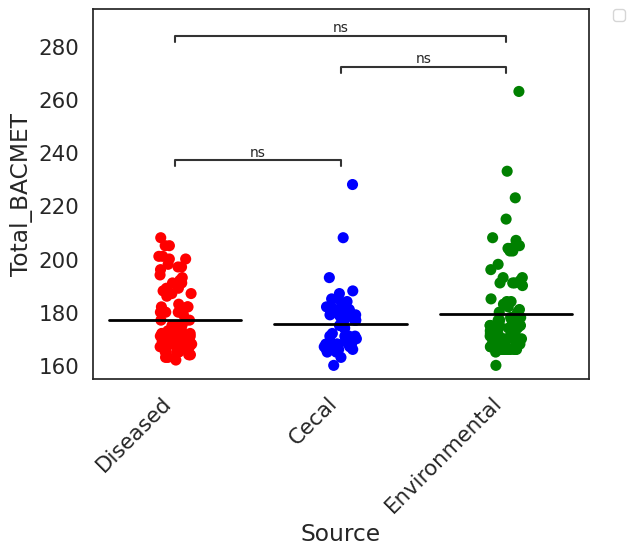

In [8]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET, 'x': 'Source', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_BACMET", data=BACMET, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_BACMET",
            data=BACMET,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofBACMETvssource.png", dpi = 400, bbox_inches= "tight")


In [9]:
islandpath = pd.read_csv("/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/VIDO_ARETE/07042023_EcoliARETE_islandpath_numberofGIperisolate.csv")

In [10]:
islandpath.head()

,Isolate,Source,Outbreak,Phylogroup,Count
0,EC_0012_1H1_D,Diseased,F0012,G,16
1,EC_0012_2H1_D,Diseased,F0012,G,13
2,EC_0012_2L1_D,Diseased,F0012,B2,1
3,EC_0012_3S1_D,Diseased,F0012,G,0
4,EC_0012_C1_H,Cecal,F0012,A,21


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:2.878e-01 t=-1.067e+00
Cecal vs. Environmental: t-test independent samples, P_val:8.046e-01 t=2.478e-01
Diseased vs. Environmental: t-test independent samples, P_val:3.489e-01 t=-9.391e-01


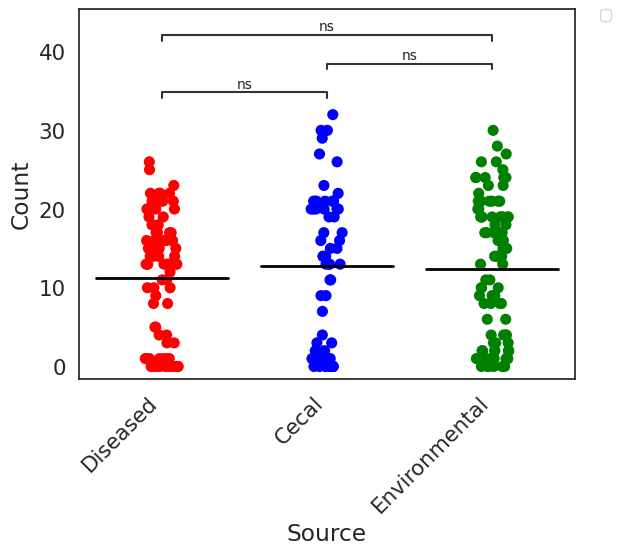

In [11]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath, 'x': 'Source', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Count", data=islandpath, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Count",
            data=islandpath,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofislandpathvssource.png", dpi = 400, bbox_inches= "tight")


In [12]:
phispy = pd.read_csv("/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/VIDO_ARETE/07042023_EcoliARETE_phispy_numberofprophageperisolate.csv")

In [13]:
phispy.head()

,Isolate,Source,Outbreak,Phylogroup,Total_Phage
0,EC_0012_1H1_D,Diseased,F0012,G,6
1,EC_0012_2H1_D,Diseased,F0012,G,6
2,EC_0012_2L1_D,Diseased,F0012,B2,2
3,EC_0012_3S1_D,Diseased,F0012,G,6
4,EC_0012_C1_H,Cecal,F0012,A,12


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Cecal: t-test independent samples, P_val:2.125e-07 t=-5.440e+00
Cecal vs. Environmental: t-test independent samples, P_val:8.428e-01 t=-1.987e-01
Diseased vs. Environmental: t-test independent samples, P_val:2.541e-09 t=-6.271e+00


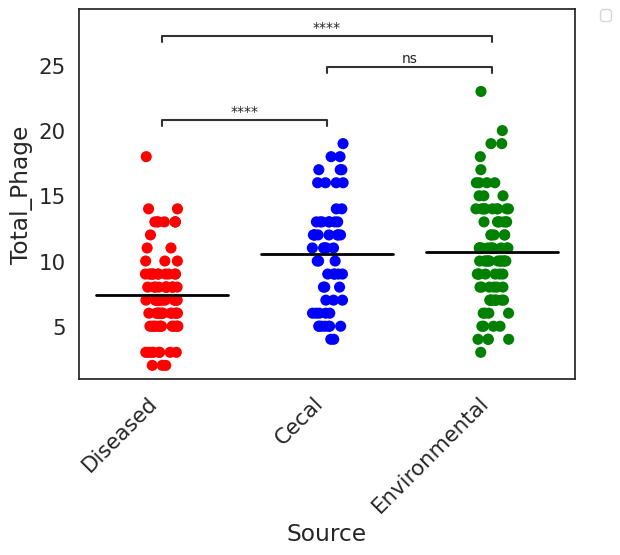

In [14]:
pairs = []

pairs2=[('Diseased', 'Cecal'), ('Diseased','Environmental'), ("Cecal","Environmental")]
states_subcat =['Diseased', 'Cecal', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy, 'x': 'Source', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_Phage", data=phispy, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_Phage",
            data=phispy,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofislandpathvssource.png", dpi = 400, bbox_inches= "tight")


In [15]:
#all features vs Outbreak

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:6.219e-02 t=1.884e+00
B1 vs. B2: t-test independent samples, P_val:1.420e-01 t=1.494e+00
B2 vs. C: t-test independent samples, P_val:5.396e-02 t=-2.003e+00
C vs. D: t-test independent samples, P_val:1.308e-01 t=-1.537e+00
D vs. E: t-test independent samples, P_val:6.316e-01 t=4.831e-01
E vs. G: t-test independent samples, P_val:4.876e-01 t=-6.996e-01
A vs. B2: t-test independent samples, P_val:2.082e-03 t=3.155e+00
B1 vs. C: t-test independent samples, P_val:7.830e-01 t=-2.774e-01
B2 vs. D: t-test independent samples, P_val:1.016e-03 t=-3.461e+00
C vs. E: t-test independent samples, P_val:2.908e-01 t=-1.095e+00
D vs. G: t-test independent samples, P_val:5.659e-01 t=-5.764e-01
A vs. C: t-test independent samples, P_val:2.619e-01 t=1.129e+00
B1 vs. D: t-test independ

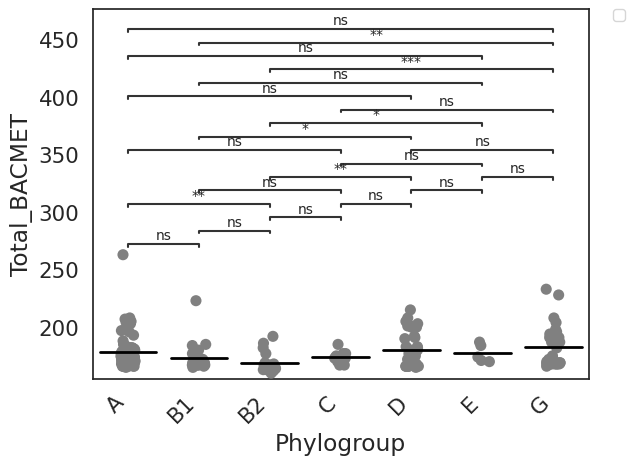

In [18]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET, 'x': 'Phylogroup', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_BACMET", data=BACMET, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_BACMET",
            data=BACMET,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofBACMETvsphylogroup.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:1.321e-04 t=3.959e+00
B1 vs. B2: t-test independent samples, P_val:3.216e-03 t=-3.109e+00
B2 vs. C: t-test independent samples, P_val:1.317e-02 t=2.630e+00
C vs. D: t-test independent samples, P_val:2.553e-01 t=-1.151e+00
D vs. E: t-test independent samples, P_val:4.349e-01 t=7.883e-01
E vs. G: t-test independent samples, P_val:3.090e-01 t=-1.028e+00
A vs. B2: t-test independent samples, P_val:8.903e-01 t=1.383e-01
B1 vs. C: t-test independent samples, P_val:9.275e-01 t=9.158e-02
B2 vs. D: t-test independent samples, P_val:7.539e-02 t=1.811e+00
C vs. E: t-test independent samples, P_val:9.535e-01 t=5.933e-02
D vs. G: t-test independent samples, P_val:7.711e-01 t=-2.920e-01
A vs. C: t-test independent samples, P_val:4.542e-03 t=2.905e+00
B1 vs. D: t-test independent

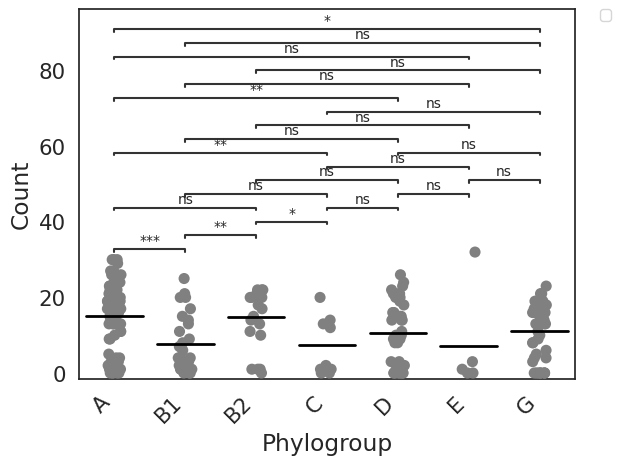

In [19]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath, 'x': 'Phylogroup', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Count", data=islandpath, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Count",
            data=islandpath,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofislandpathvsphylogroup.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:8.197e-03 t=2.691e+00
B1 vs. B2: t-test independent samples, P_val:1.460e-01 t=1.479e+00
B2 vs. C: t-test independent samples, P_val:2.605e-01 t=-1.146e+00
C vs. D: t-test independent samples, P_val:5.618e-01 t=5.842e-01
D vs. E: t-test independent samples, P_val:9.195e-02 t=-1.725e+00
E vs. G: t-test independent samples, P_val:1.802e-03 t=3.309e+00
A vs. B2: t-test independent samples, P_val:1.696e-04 t=3.898e+00
B1 vs. C: t-test independent samples, P_val:9.469e-01 t=6.704e-02
B2 vs. D: t-test independent samples, P_val:4.704e-01 t=-7.265e-01
C vs. E: t-test independent samples, P_val:2.862e-01 t=-1.106e+00
D vs. G: t-test independent samples, P_val:1.034e-01 t=1.647e+00
A vs. C: t-test independent samples, P_val:5.471e-02 t=1.944e+00
B1 vs. D: t-test independent

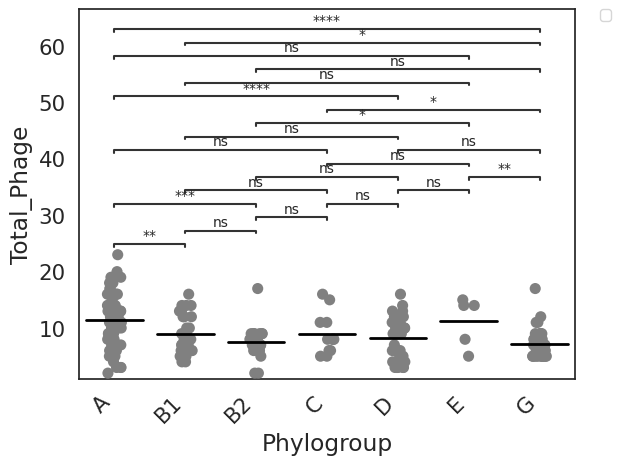

In [20]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy, 'x': 'Phylogroup', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_Phage", data=phispy, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_Phage",
            data=phispy,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofphagevsphylogroup.png", dpi = 400, bbox_inches= "tight")

In [21]:
#total features vs outbreak

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:1.010e-01 t=-1.734e+00
F0038 vs. F0205: t-test independent samples, P_val:3.245e-01 t=-1.010e+00
F0205 vs. F0731: t-test independent samples, P_val:8.915e-01 t=-1.386e-01
F0731 vs. F23315: t-test independent samples, P_val:4.356e-01 t=8.010e-01
F23315 vs. F2402: t-test independent samples, P_val:3.047e-02 t=-2.452e+00
F2402 vs. F2655: t-test independent samples, P_val:3.613e-02 t=2.586e+00
F2655 vs. F3862: t-test independent samples, P_val:6.958e-01 t=-4.025e-01
F3862 vs. F4957: t-test independent samples, P_val:4.724e-02 t=2.191e+00
F4957 vs. F4984: t-test independent samples, P_val:5.367e-01 t=6.455e-01
F4984 vs. F6041: t-test independent samples, P_val:4.995e-01 t=-6.982e-01
F6041 vs. F6245: t-test independent samples, P_val:5.319e-01 t=6.367e-01
F6245 vs

F2402 vs. F7578: t-test independent samples, P_val:3.348e-03 t=4.119e+00
F2655 vs. F8630: t-test independent samples, P_val:7.522e-01 t=3.246e-01
F3862 vs. F9226: t-test independent samples, P_val:8.109e-01 t=-2.430e-01
F4957 vs. F9413: t-test independent samples, P_val:1.995e-01 t=-1.342e+00
F4984 vs. F9503: t-test independent samples, P_val:9.033e-01 t=-1.260e-01
F6041 vs. F9619: t-test independent samples, P_val:7.337e-01 t=-3.450e-01
F0012 vs. F4984: t-test independent samples, P_val:2.615e-01 t=1.208e+00
F0038 vs. F6041: t-test independent samples, P_val:8.223e-01 t=2.276e-01
F0205 vs. F6245: t-test independent samples, P_val:1.287e-01 t=1.589e+00
F0731 vs. F7360: t-test independent samples, P_val:4.275e-02 t=2.290e+00
F23315 vs. F7578: t-test independent samples, P_val:9.950e-02 t=1.764e+00
F2402 vs. F8630: t-test independent samples, P_val:2.519e-02 t=2.680e+00
F2655 vs. F9226: t-test independent samples, P_val:5.820e-01 t=-5.627e-01
F3862 vs. F9413: t-test independent samples, 

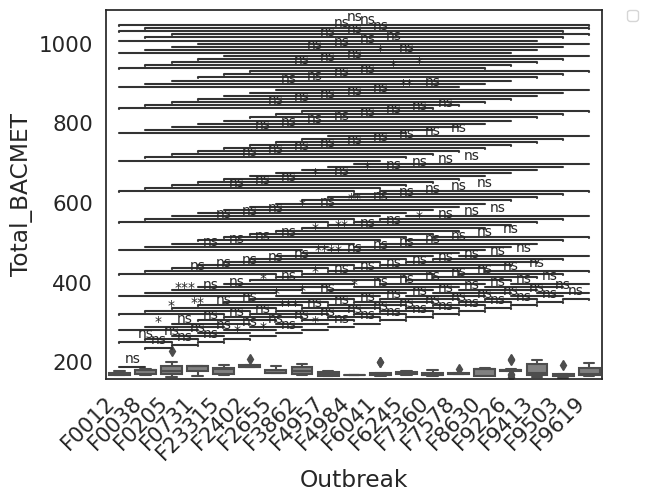

In [24]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F2655', 'F3862', 'F4957', 'F4984', 'F6041', 'F6245', 'F7360', 'F7578', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET, 'x': 'Outbreak', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Total_BACMET", data=BACMET, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofBACMETvsoutbreak.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:1.176e-02 t=-2.822e+00
F0038 vs. F0205: t-test independent samples, P_val:2.366e-02 t=2.449e+00
F0205 vs. F0731: t-test independent samples, P_val:8.056e-02 t=1.865e+00
F0731 vs. F23315: t-test independent samples, P_val:2.696e-01 t=-1.146e+00
F23315 vs. F2402: t-test independent samples, P_val:5.483e-01 t=-6.177e-01
F2402 vs. F2655: t-test independent samples, P_val:3.165e-01 t=1.079e+00
F2655 vs. F3862: t-test independent samples, P_val:7.161e-01 t=-3.742e-01
F3862 vs. F4957: t-test independent samples, P_val:4.002e-01 t=8.697e-01
F4957 vs. F4984: t-test independent samples, P_val:2.971e-01 t=-1.115e+00
F4984 vs. F6041: t-test independent samples, P_val:2.994e-01 t=1.089e+00
F6041 vs. F6245: t-test independent samples, P_val:3.479e-01 t=9.625e-01
F6245 vs.

F4957 vs. F9413: t-test independent samples, P_val:8.294e-01 t=2.192e-01
F4984 vs. F9503: t-test independent samples, P_val:4.640e-01 t=7.744e-01
F6041 vs. F9619: t-test independent samples, P_val:9.812e-01 t=2.391e-02
F0012 vs. F4984: t-test independent samples, P_val:2.589e-01 t=-1.215e+00
F0038 vs. F6041: t-test independent samples, P_val:1.540e-02 t=2.649e+00
F0205 vs. F6245: t-test independent samples, P_val:2.167e-01 t=1.278e+00
F0731 vs. F7360: t-test independent samples, P_val:4.267e-01 t=8.253e-01
F23315 vs. F7578: t-test independent samples, P_val:1.681e-01 t=1.454e+00
F2402 vs. F8630: t-test independent samples, P_val:8.393e-01 t=2.087e-01
F2655 vs. F9226: t-test independent samples, P_val:4.392e-01 t=7.948e-01
F3862 vs. F9413: t-test independent samples, P_val:2.392e-01 t=1.229e+00
F4957 vs. F9503: t-test independent samples, P_val:4.658e-01 t=-7.514e-01
F4984 vs. F9619: t-test independent samples, P_val:4.311e-01 t=8.173e-01
F0012 vs. F6041: t-test independent samples, P_v

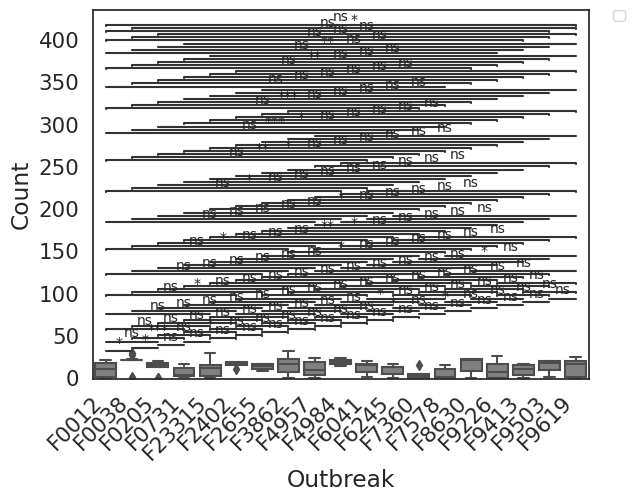

In [25]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F2655', 'F3862', 'F4957', 'F4984', 'F6041', 'F6245', 'F7360', 'F7578', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath, 'x': 'Outbreak', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Count", data=islandpath, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofislandpathvsoutbreak.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:1.633e-02 t=-2.665e+00
F0038 vs. F0205: t-test independent samples, P_val:1.897e-02 t=2.553e+00
F0205 vs. F0731: t-test independent samples, P_val:9.285e-01 t=-9.119e-02
F0731 vs. F23315: t-test independent samples, P_val:2.812e-01 t=-1.118e+00
F23315 vs. F2402: t-test independent samples, P_val:6.518e-02 t=2.030e+00
F2402 vs. F2655: t-test independent samples, P_val:2.935e-01 t=1.136e+00
F2655 vs. F3862: t-test independent samples, P_val:2.024e-02 t=-2.757e+00
F3862 vs. F4957: t-test independent samples, P_val:2.871e-01 t=-1.110e+00
F4957 vs. F4984: t-test independent samples, P_val:1.290e-01 t=1.692e+00
F4984 vs. F6041: t-test independent samples, P_val:4.612e-01 t=-7.635e-01
F6041 vs. F6245: t-test independent samples, P_val:8.537e-01 t=-1.869e-01
F6245 v

F2655 vs. F8630: t-test independent samples, P_val:3.877e-04 t=-5.224e+00
F3862 vs. F9226: t-test independent samples, P_val:7.728e-02 t=1.881e+00
F4957 vs. F9413: t-test independent samples, P_val:6.982e-02 t=1.952e+00
F4984 vs. F9503: t-test independent samples, P_val:5.104e-01 t=-6.935e-01
F6041 vs. F9619: t-test independent samples, P_val:1.628e-03 t=-3.640e+00
F0012 vs. F4984: t-test independent samples, P_val:7.039e-01 t=3.940e-01
F0038 vs. F6041: t-test independent samples, P_val:3.034e-03 t=3.372e+00
F0205 vs. F6245: t-test independent samples, P_val:8.907e-01 t=1.393e-01
F0731 vs. F7360: t-test independent samples, P_val:4.979e-01 t=-7.009e-01
F23315 vs. F7578: t-test independent samples, P_val:5.302e-01 t=6.437e-01
F2402 vs. F8630: t-test independent samples, P_val:2.325e-04 t=-5.888e+00
F2655 vs. F9226: t-test independent samples, P_val:2.602e-01 t=-1.170e+00
F3862 vs. F9413: t-test independent samples, P_val:6.125e-01 t=5.181e-01
F4957 vs. F9503: t-test independent samples,

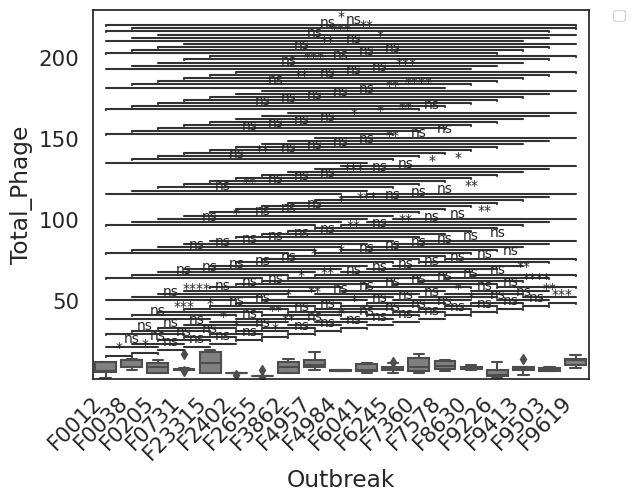

In [26]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F2655', 'F3862', 'F4957', 'F4984', 'F6041', 'F6245', 'F7360', 'F7578', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy, 'x': 'Outbreak', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Total_Phage", data=phispy, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07042023_EcoliARETE_sumofphagevsoutbreak.png", dpi = 400, bbox_inches= "tight")

In [28]:
#ANOVA for all the features and categories with phylogroup
BACMET_ANOVA = BACMET[~BACMET['Phylogroup'].str.contains('U|cryptic|F')]
islandpath_ANOVA = islandpath[~islandpath['Phylogroup'].str.contains('U|cryptic|F')]
phispy_ANOVA = phispy[~phispy['Phylogroup'].str.contains('U|cryptic|F')]

In [29]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in BACMET_ANOVA['Source'].unique():
    #make the model
    model = smf.ols('Total_BACMET ~ C(Phylogroup)', data=BACMET_ANOVA[BACMET_ANOVA['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p', 'Environmental_p']]
all_r


,Diseased_p,Cecal_p,Environmental_p
C(Phylogroup),0.000027,0.027783,0.017123


In [31]:
records = []
for AT in BACMET_ANOVA['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(BACMET_ANOVA[BACMET_ANOVA['Source']==AT],
                 val_col='Total_BACMET',
                 group_col='Phylogroup',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]


,Feature,query,subject,P
0,Diseased,G,G,1.000000
1,Diseased,G,B2,0.268090
2,Diseased,G,D,0.016706
3,Diseased,G,A,1.000000
4,Diseased,G,C,1.000000


In [32]:
ttests.to_csv("07042023_EcoliARETE_BACMETSourcePhylogroup_ttests.csv")

In [33]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in islandpath_ANOVA['Source'].unique():
    #make the model
    model = smf.ols('Count ~ C(Phylogroup)', data=islandpath_ANOVA[islandpath_ANOVA['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p', 'Environmental_p']]
all_r


,Diseased_p,Cecal_p,Environmental_p
C(Phylogroup),0.034495,0.003311,0.007069


In [34]:
records = []
for AT in islandpath_ANOVA['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(islandpath_ANOVA[islandpath_ANOVA['Source']==AT],
                 val_col='Count',
                 group_col='Phylogroup',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

,Feature,query,subject,P
0,Diseased,G,G,1.000000
1,Diseased,G,B2,0.246507
2,Diseased,G,D,1.000000
3,Diseased,G,A,1.000000
4,Diseased,G,C,1.000000


In [35]:
ttests.to_csv("07042023_EcoliARETE_islandpathSourcePhylogroup_ttests.csv")

In [38]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in phispy_ANOVA['Source'].unique():
    #make the model
    model = smf.ols('Total_Phage ~ C(Phylogroup)', data=phispy_ANOVA[phispy_ANOVA['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p', 'Environmental_p']]
all_r


,Diseased_p,Cecal_p,Environmental_p
C(Phylogroup),0.01348,0.003798,0.12421


In [39]:
records = []
for AT in phispy_ANOVA['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(phispy_ANOVA[phispy_ANOVA['Source']==AT],
                 val_col='Total_Phage',
                 group_col='Phylogroup',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]


,Feature,query,subject,P
0,Diseased,G,G,1.000000
1,Diseased,G,B2,1.000000
2,Diseased,G,D,1.000000
3,Diseased,G,A,0.072945
4,Diseased,G,C,0.468317


In [40]:
ttests.to_csv("07042023_EcoliARETE_phispySourcePhylogroup_ttests.csv")

In [41]:
#ANOVA for all the features and categories with outbreak

In [43]:
BACMETnona=BACMET.dropna()
islandpathnona=islandpath.dropna()
phispynona=phispy.dropna()

In [44]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in BACMETnona['Source'].unique():
    #make the model
    model = smf.ols('Total_BACMET ~ C(Outbreak)', data=BACMETnona[BACMETnona['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p']]
all_r

,Diseased_p,Cecal_p
C(Outbreak),0.069157,0.006122


In [45]:
records = []
for AT in BACMETnona['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(BACMETnona[BACMETnona['Source']==AT],
                 val_col='Total_BACMET',
                 group_col='Outbreak',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/haley/miniconda3/envs/jupyter/lib/pyth

,Feature,query,subject,P
0,Diseased,F0012,F0012,1.000000
1,Diseased,F0012,F0038,1.000000
2,Diseased,F0012,F0205,1.000000
3,Diseased,F0012,F0731,0.000001
4,Diseased,F0012,F23315,1.000000


In [46]:
ttests.to_csv("05292023_EcoliARETE_BACMETSourceOutbreak_ttests.csv")

In [47]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in islandpathnona['Source'].unique():
    #make the model
    model = smf.ols('Count ~ C(Outbreak)', data=islandpathnona[islandpathnona['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p']]
all_r

,Diseased_p,Cecal_p
C(Outbreak),0.106133,0.011975


In [48]:
records = []
for AT in islandpathnona['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(islandpathnona[islandpathnona['Source']==AT],
                 val_col='Count',
                 group_col='Outbreak',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Feature,query,subject,P
0,Diseased,F0012,F0012,1.0
1,Diseased,F0012,F0038,1.0
2,Diseased,F0012,F0205,1.0
3,Diseased,F0012,F0731,1.0
4,Diseased,F0012,F23315,1.0


In [49]:
ttests.to_csv("05292023_EcoliARETE_islandpathSourceOutbreak_ttests.csv")

In [50]:
#One way ANOVA for impact of Sequencing condition on total plasmids in each assembly type
results = []
#'source' is AMR, GI, phage, etc....
for AT in phispynona['Source'].unique():
    #make the model
    model = smf.ols('Total_Phage ~ C(Outbreak)', data=phispynona[phispynona['Source']==AT]).fit()
    #calculate anova. We use type 3 SS in this paper.
    d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
    d = d[['PR(>F)']]
    d.rename({'PR(>F)': "{}_p".format(AT)}, axis=1, inplace=True)
    results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()[['Diseased_p', 'Cecal_p']]
all_r

,Diseased_p,Cecal_p
C(Outbreak),2.196627e-07,0.12711


In [51]:
records = []
for AT in phispynona['Source'].unique(): #AMR, HMR, plasmid, etc...
    # this calculates adjusted p value
    d = sp.posthoc_ttest(phispynona[phispynona['Source']==AT],
                 val_col='Total_Phage',
                 group_col='Outbreak',
                 p_adjust='bonferroni')
    #Format the result into a dict
    for i in d.index:
        for j in d.columns:
            records.append({'Feature': AT, 'query': i, 'subject': j, 'P': d.loc[i][j]})
ttests = pd.DataFrame.from_records(records)
ttests.head()

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1651: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  vs[i, j] = ss.ttest_ind(xg.get_group(groups[i]), xg.get_group(groups[j]), equal_var=equal_var)[1]
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/haley/miniconda3/envs/jupyter/lib/pyth

,Feature,query,subject,P
0,Diseased,F0012,F0012,1.0
1,Diseased,F0012,F0038,1.0
2,Diseased,F0012,F0205,1.0
3,Diseased,F0012,F0731,1.0
4,Diseased,F0012,F23315,1.0


In [52]:
ttests.to_csv("05292023_EcoliARETE_phispySourceOutbreak_ttests.csv")

In [ ]:
#from ANOVA, BACMET need to look at Phylogroup DCE, Outbreak DC

In [57]:
BACMET_ANOVA_d = BACMET_ANOVA[BACMET_ANOVA['Source'].str.contains('Diseased')]
BACMET_ANOVA_c = BACMET_ANOVA[BACMET_ANOVA['Source'].str.contains('Cecal')]
BACMET_ANOVA_e = BACMET_ANOVA[BACMET_ANOVA['Source'].str.contains('Environmental')]


/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:4.287e-02 t=2.149e+00
B1 vs. B2: t-test independent samples, P_val:9.272e-01 t=-9.237e-02
B2 vs. C: t-test independent samples, P_val:5.163e-01 t=-6.621e-01
C vs. D: t-test independent samples, P_val:4.631e-02 t=-2.186e+00
D vs. G: t-test independent samples, P_val:1.114e-03 t=3.501e+00
A vs. B2: t-test independent samples, P_val:1.236e-02 t=2.651e+00
B1 vs. C: t-test independent samples, P_val:9.321e-02 t=-1.905e+00
B2 vs. D: t-test independent samples, P_val:2.320e-05 t=-5.065e+00
C vs. G: t-test independent samples, P_val:5.326e-01 t=-6.309e-01
A vs. C: t-test independent samples, P_val:3.985e-01 t=8.648e-01
B1 vs. D: t-test independent samples, P_val:6.787e-04 t=-4.096e+00
B2 vs. G: t-test independent samples, P_val:1.787e-02 t=-2.456e+00
A vs. D: t-test indepe

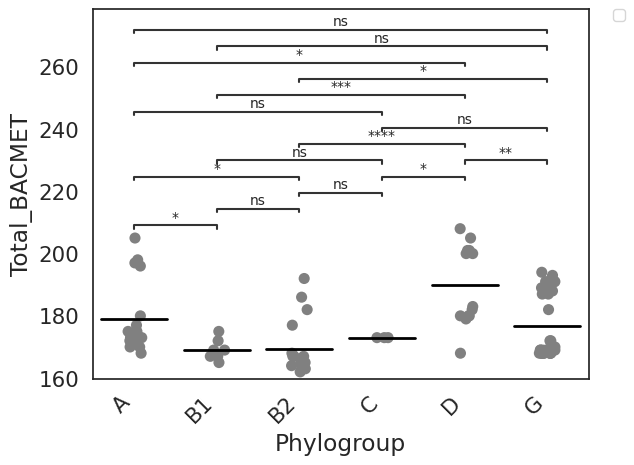

In [60]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "G"), ("C", "D"), ("C", "G"), ("D", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET_ANOVA_d, 'x': 'Phylogroup', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_BACMET", data=BACMET_ANOVA_d, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_BACMET",
            data=BACMET_ANOVA_d,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofBACMETvsphylogroupdiseased.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:3.033e-02 t=2.246e+00
B1 vs. B2: t-test independent samples, P_val:3.663e-02 t=2.329e+00
B2 vs. C: t-test independent samples, P_val:1.608e-02 t=-3.316e+00
C vs. D: t-test independent samples, P_val:4.480e-01 t=8.037e-01
D vs. E: t-test independent samples, P_val:1.998e-01 t=-1.441e+00
E vs. G: t-test independent samples, P_val:6.754e-01 t=-4.510e-01
A vs. B2: t-test independent samples, P_val:8.301e-03 t=2.808e+00
B1 vs. C: t-test independent samples, P_val:8.788e-02 t=-1.845e+00
B2 vs. D: t-test independent samples, P_val:5.154e-02 t=-2.344e+00
C vs. E: t-test independent samples, P_val:4.879e-01 t=-7.484e-01
D vs. G: t-test independent samples, P_val:2.990e-01 t=-1.137e+00
A vs. C: t-test independent samples, P_val:8.831e-01 t=1.482e-01
B1 vs. D: t-test independ

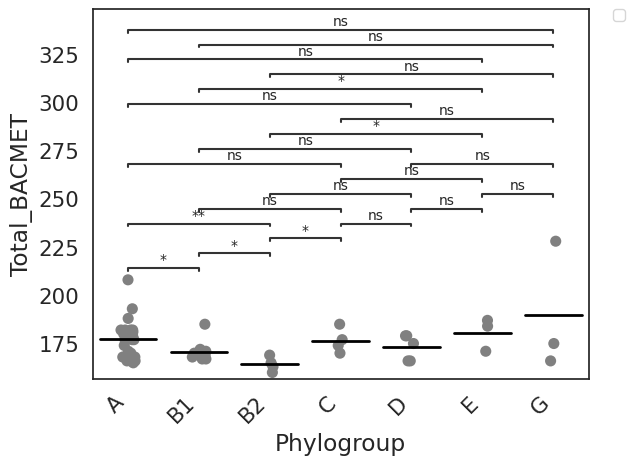

In [61]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET_ANOVA_c, 'x': 'Phylogroup', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_BACMET", data= BACMET_ANOVA_c, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_BACMET",
            data=BACMET_ANOVA_c,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofBACMETvsphylogroupcecal.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:9.374e-01 t=7.902e-02
B1 vs. C: t-test independent samples, P_val:4.657e-01 t=7.535e-01
C vs. D: t-test independent samples, P_val:5.281e-01 t=-6.402e-01
D vs. E: t-test independent samples, P_val:6.742e-01 t=4.264e-01
E vs. G: t-test independent samples, P_val:6.303e-02 t=-2.091e+00
A vs. C: t-test independent samples, P_val:3.925e-01 t=8.638e-01
B1 vs. D: t-test independent samples, P_val:7.383e-01 t=3.374e-01
C vs. E: t-test independent samples, P_val:9.596e-01 t=5.324e-02
D vs. G: t-test independent samples, P_val:1.041e-03 t=-3.644e+00
A vs. D: t-test independent samples, P_val:5.602e-01 t=5.859e-01
B1 vs. E: t-test independent samples, P_val:6.370e-01 t=4.884e-01
C vs. G: t-test independent samples, P_val:5.879e-03 t=-3.288e+00
A vs. E: t-test independent sam

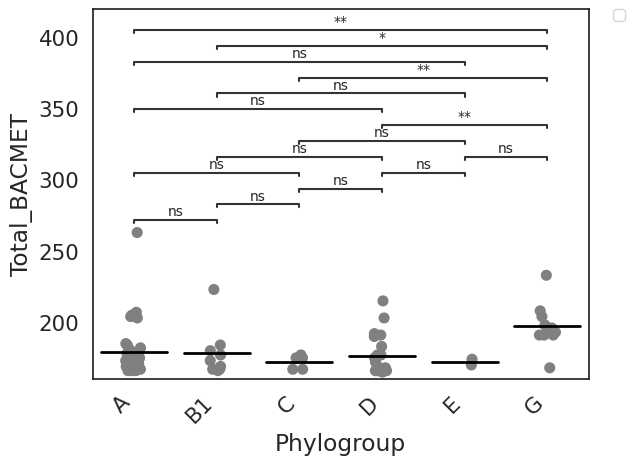

In [63]:
pairs = []

pairs2=[('A', 'B1'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET_ANOVA_e, 'x': 'Phylogroup', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_BACMET", data= BACMET_ANOVA_e, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_BACMET",
            data=BACMET_ANOVA_e,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofBACMETvsphylogroupenvironmental.png", dpi = 400, bbox_inches= "tight")

In [64]:
BACMET_o_d = BACMETnona[BACMETnona['Source'].str.contains('Diseased')]
BACMET_o_c = BACMETnona[BACMETnona['Source'].str.contains('Cecal')]

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:6.704e-01 t=4.472e-01
F0038 vs. F0205: t-test independent samples, P_val:2.047e-01 t=-1.381e+00
F0205 vs. F0731: t-test independent samples, P_val:1.911e-01 t=-1.428e+00
F0731 vs. F23315: t-test independent samples, P_val:1.832e-07 t=4.004e+01
F23315 vs. F2402: t-test independent samples, P_val:1.509e-05 t=-2.504e+01
F2402 vs. F3862: t-test independent samples, P_val:4.778e-01 t=7.668e-01
F3862 vs. F4957: t-test independent samples, P_val:1.628e-01 t=1.560e+00
F4957 vs. F6041: t-test independent samples, P_val:1.269e-01 t=-1.732e+00
F6041 vs. F6245: t-test independent samples, P_val:5.244e-02 t=2.275e+00
F6245 vs. F7360: t-test independent samples, P_val:8.153e-01 t=2.425e-01
F7360 vs. F8630: t-test independent samples, P_val:4.278e-01 t=-8.502e-01
F8630 vs.

F0205 vs. F9503: t-test independent samples, P_val:4.229e-01 t=8.446e-01
F0731 vs. F9619: t-test independent samples, P_val:1.258e-01 t=1.670e+00
F0012 vs. F9413: t-test independent samples, P_val:1.861e-01 t=-1.446e+00
F0038 vs. F9503: t-test independent samples, P_val:6.862e-01 t=-4.243e-01
F0205 vs. F9619: t-test independent samples, P_val:9.323e-01 t=8.672e-02
F0012 vs. F9503: t-test independent samples, P_val:7.339e-01 t=-3.562e-01
F0038 vs. F9619: t-test independent samples, P_val:1.837e-01 t=-1.428e+00
F0012 vs. F9619: t-test independent samples, P_val:2.021e-01 t=-1.365e+00


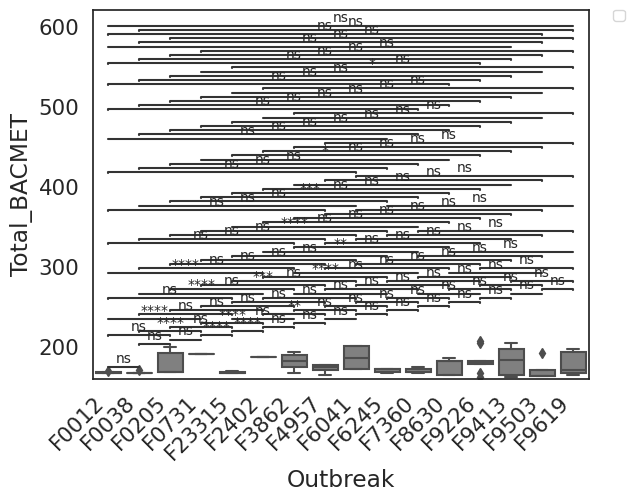

In [66]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F3862', 'F4957', 'F6041', 'F6245', 'F7360', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET_o_d, 'x': 'Outbreak', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Total_BACMET", data=BACMET_o_d, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofBACMETvsoutbreak_diseased.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:1.529e-03 t=-4.482e+00
F0038 vs. F0205: t-test independent samples, P_val:5.954e-01 t=-5.485e-01
F0205 vs. F0731: t-test independent samples, P_val:4.497e-01 t=8.085e-01
F0731 vs. F23315: t-test independent samples, P_val:6.342e-02 t=-2.154e+00
F23315 vs. F2402: t-test independent samples, P_val:nan t=nan
F2402 vs. F3862: t-test independent samples, P_val:nan t=nan
F3862 vs. F4957: t-test independent samples, P_val:1.380e-01 t=1.850e+00
F4957 vs. F6041: t-test independent samples, P_val:1.713e-01 t=-1.503e+00
F6041 vs. F6245: t-test independent samples, P_val:1.632e-02 t=-2.946e+00
F6245 vs. F7360: t-test independent samples, P_val:7.499e-01 t=3.368e-01
F7360 vs. F8630: t-test independent samples, P_val:7.370e-01 t=-3.684e-01
F8630 vs. F9226: t-test independ

F0038 vs. F9503: t-test independent samples, P_val:1.395e-04 t=6.788e+00
F0205 vs. F9619: t-test independent samples, P_val:3.909e-01 t=9.244e-01
F0012 vs. F9503: t-test independent samples, P_val:5.981e-02 t=2.424e+00
F0038 vs. F9619: t-test independent samples, P_val:2.510e-03 t=4.331e+00
F0012 vs. F9619: t-test independent samples, P_val:4.127e-01 t=8.931e-01


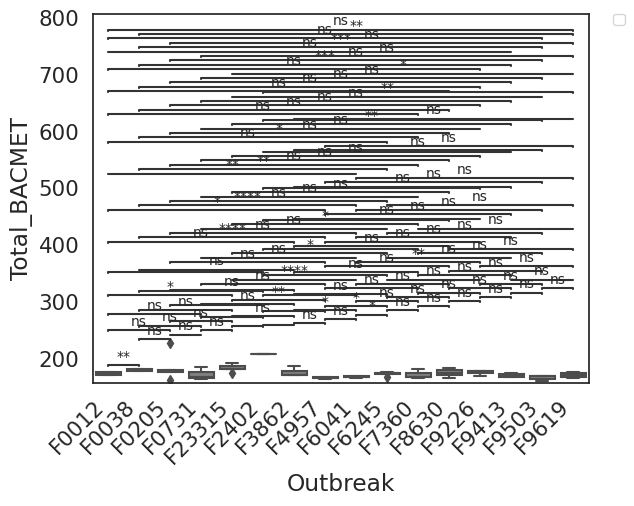

In [67]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F3862', 'F4957', 'F6041', 'F6245', 'F7360', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMET_o_c, 'x': 'Outbreak', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Total_BACMET", data=BACMET_o_c, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofBACMETvsoutbreak_cecal.png", dpi = 400, bbox_inches= "tight")

In [68]:
#from ANOVA, islandpath need to look at Phylogroup DCE, Outbreak C

In [69]:
islandpath_ANOVA_d = islandpath_ANOVA[islandpath_ANOVA['Source'].str.contains('Diseased')]
islandpath_ANOVA_c = islandpath_ANOVA[islandpath_ANOVA['Source'].str.contains('Cecal')]
islandpath_ANOVA_e = islandpath_ANOVA[islandpath_ANOVA['Source'].str.contains('Environmental')]
islandpath_o_c = islandpathnona[islandpathnona['Source'].str.contains('Cecal')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:3.300e-01 t=9.961e-01
B1 vs. B2: t-test independent samples, P_val:8.827e-03 t=-2.873e+00
B2 vs. C: t-test independent samples, P_val:3.359e-01 t=9.886e-01
C vs. D: t-test independent samples, P_val:4.955e-01 t=6.998e-01
D vs. G: t-test independent samples, P_val:3.491e-01 t=-9.469e-01
A vs. B2: t-test independent samples, P_val:9.649e-03 t=-2.753e+00
B1 vs. C: t-test independent samples, P_val:3.303e-01 t=-1.036e+00
B2 vs. D: t-test independent samples, P_val:1.279e-02 t=2.660e+00
C vs. G: t-test independent samples, P_val:7.411e-01 t=3.333e-01
A vs. C: t-test independent samples, P_val:5.495e-01 t=-6.099e-01
B1 vs. D: t-test independent samples, P_val:6.811e-01 t=-4.177e-01
B2 vs. G: t-test independent samples, P_val:1.643e-02 t=2.490e+00
A vs. D: t-test independ

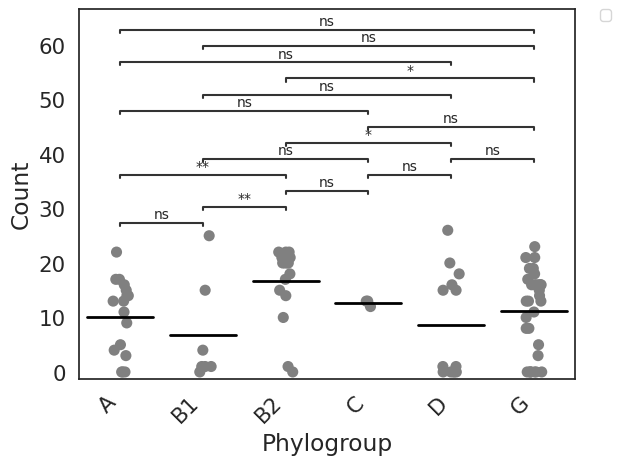

In [71]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "G"), ("C", "D"), ("C", "G"), ("D", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath_ANOVA_d, 'x': 'Phylogroup', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Count", data= islandpath_ANOVA_d, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Count",
            data=islandpath_ANOVA_d,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofGIvsphylogroupdiseased.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:2.752e-03 t=3.192e+00
B1 vs. B2: t-test independent samples, P_val:6.385e-01 t=4.810e-01
B2 vs. C: t-test independent samples, P_val:9.227e-01 t=-1.012e-01
C vs. D: t-test independent samples, P_val:4.515e-01 t=7.972e-01
D vs. E: t-test independent samples, P_val:4.047e-01 t=-8.961e-01
E vs. G: t-test independent samples, P_val:8.985e-01 t=-1.359e-01
A vs. B2: t-test independent samples, P_val:1.456e-02 t=2.579e+00
B1 vs. C: t-test independent samples, P_val:7.308e-01 t=3.516e-01
B2 vs. D: t-test independent samples, P_val:4.812e-01 t=7.438e-01
C vs. E: t-test independent samples, P_val:7.015e-01 t=-4.060e-01
D vs. G: t-test independent samples, P_val:1.656e-01 t=-1.578e+00
A vs. C: t-test independent samples, P_val:2.041e-02 t=2.436e+00
B1 vs. D: t-test independen

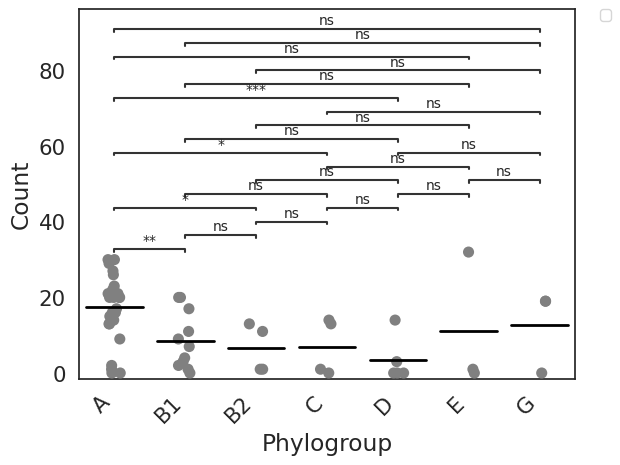

In [72]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath_ANOVA_c, 'x': 'Phylogroup', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Count", data= islandpath_ANOVA_c, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Count",
            data=islandpath_ANOVA_c,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofGIvsphylogroupcecal.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:1.962e-02 t=2.416e+00
B1 vs. C: t-test independent samples, P_val:5.302e-01 t=6.464e-01
C vs. D: t-test independent samples, P_val:2.425e-02 t=-2.405e+00
D vs. E: t-test independent samples, P_val:2.885e-02 t=2.346e+00
E vs. G: t-test independent samples, P_val:1.018e-01 t=-1.802e+00
A vs. C: t-test independent samples, P_val:1.656e-02 t=2.494e+00
B1 vs. D: t-test independent samples, P_val:4.110e-02 t=-2.141e+00
C vs. E: t-test independent samples, P_val:6.297e-01 t=5.132e-01
D vs. G: t-test independent samples, P_val:2.849e-01 t=1.089e+00
A vs. D: t-test independent samples, P_val:5.079e-01 t=6.662e-01
B1 vs. E: t-test independent samples, P_val:2.833e-01 t=1.141e+00
C vs. G: t-test independent samples, P_val:1.717e-01 t=-1.447e+00
A vs. E: t-test independent sam

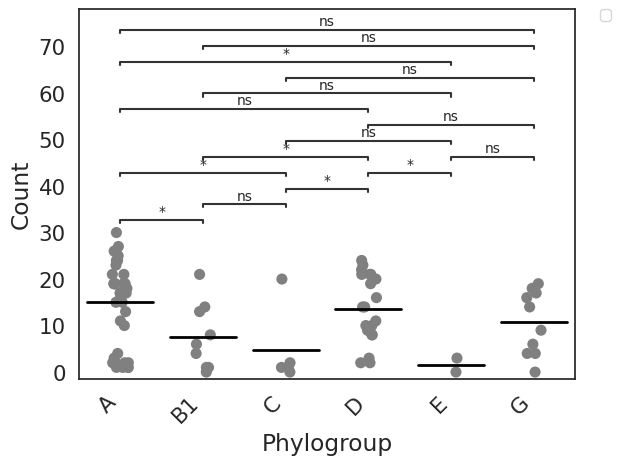

In [73]:
pairs = []

pairs2=[('A', 'B1'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath_ANOVA_e, 'x': 'Phylogroup', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Count", data= islandpath_ANOVA_e, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Count",
            data=islandpath_ANOVA_e,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofGIvsphylogroupenvironmental.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:3.019e-02 t=-2.570e+00
F0038 vs. F0205: t-test independent samples, P_val:1.350e-02 t=2.993e+00
F0205 vs. F0731: t-test independent samples, P_val:5.267e-04 t=6.723e+00
F0731 vs. F23315: t-test independent samples, P_val:1.502e-01 t=-1.591e+00
F23315 vs. F2402: t-test independent samples, P_val:nan t=nan
F2402 vs. F3862: t-test independent samples, P_val:nan t=nan
F3862 vs. F4957: t-test independent samples, P_val:8.996e-01 t=1.343e-01
F4957 vs. F6041: t-test independent samples, P_val:2.858e-01 t=1.144e+00
F6041 vs. F6245: t-test independent samples, P_val:7.376e-01 t=3.456e-01
F6245 vs. F7360: t-test independent samples, P_val:2.555e-02 t=3.144e+00
F7360 vs. F8630: t-test independent samples, P_val:4.950e-01 t=7.746e-01
F8630 vs. F9226: t-test independent 

F0205 vs. F9619: t-test independent samples, P_val:5.635e-01 t=6.112e-01
F0012 vs. F9503: t-test independent samples, P_val:3.374e-01 t=1.061e+00
F0038 vs. F9619: t-test independent samples, P_val:7.139e-02 t=2.078e+00
F0012 vs. F9619: t-test independent samples, P_val:9.379e-01 t=-8.185e-02


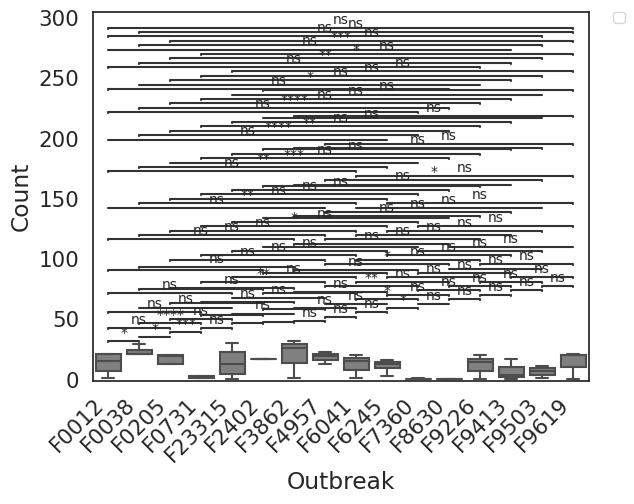

In [74]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F3862', 'F4957', 'F6041', 'F6245', 'F7360', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': islandpath_o_c, 'x': 'Outbreak', 'y': 'Count', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Count", data=islandpath_o_c, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofGIvsoutbreak_cecal.png", dpi = 400, bbox_inches= "tight")

In [75]:
#from ANOVA, phispy need to look at Phylogroup DC, outbreak D

In [76]:
phispy_ANOVA_d = phispy_ANOVA[phispy_ANOVA['Source'].str.contains('Diseased')]
phispy_ANOVA_c = phispy_ANOVA[phispy_ANOVA['Source'].str.contains('Cecal')]

phispy_o_d = phispynona[phispynona['Source'].str.contains('Diseased')]

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:7.546e-01 t=-3.165e-01
B1 vs. B2: t-test independent samples, P_val:5.330e-02 t=2.042e+00
B2 vs. C: t-test independent samples, P_val:5.118e-01 t=-6.693e-01
C vs. D: t-test independent samples, P_val:3.836e-01 t=8.996e-01
D vs. G: t-test independent samples, P_val:9.793e-01 t=2.604e-02
A vs. B2: t-test independent samples, P_val:1.589e-01 t=1.442e+00
B1 vs. C: t-test independent samples, P_val:4.858e-01 t=7.306e-01
B2 vs. D: t-test independent samples, P_val:4.183e-01 t=8.215e-01
C vs. G: t-test independent samples, P_val:3.122e-02 t=2.253e+00
A vs. C: t-test independent samples, P_val:7.389e-01 t=3.385e-01
B1 vs. D: t-test independent samples, P_val:5.043e-02 t=2.096e+00
B2 vs. G: t-test independent samples, P_val:1.100e-01 t=1.630e+00
A vs. D: t-test independent 

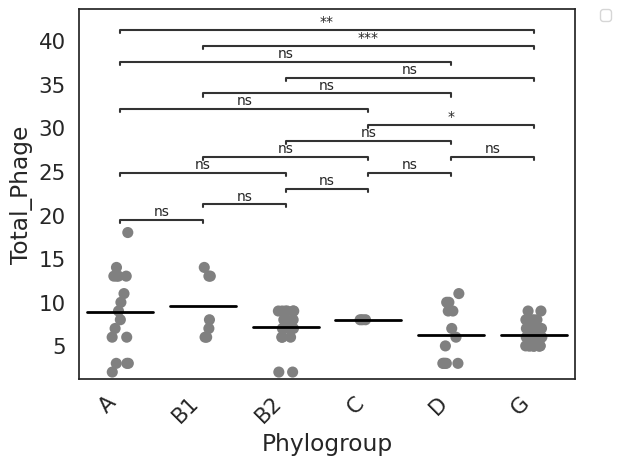

In [77]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "G"), ("C", "D"), ("C", "G"), ("D", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy_ANOVA_d, 'x': 'Phylogroup', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_Phage", data= phispy_ANOVA_d, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_Phage",
            data=phispy_ANOVA_d,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofphagevsphylogroupdiseased.png", dpi = 400, bbox_inches= "tight")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B1: t-test independent samples, P_val:2.796e-03 t=3.186e+00
B1 vs. B2: t-test independent samples, P_val:7.235e-01 t=-3.616e-01
B2 vs. C: t-test independent samples, P_val:3.900e-01 t=9.264e-01
C vs. D: t-test independent samples, P_val:6.139e-01 t=-5.279e-01
D vs. E: t-test independent samples, P_val:6.662e-01 t=-4.534e-01
E vs. G: t-test independent samples, P_val:1.000e+00 t=0.000e+00
A vs. B2: t-test independent samples, P_val:1.223e-01 t=1.586e+00
B1 vs. C: t-test independent samples, P_val:3.757e-01 t=9.172e-01
B2 vs. D: t-test independent samples, P_val:5.563e-01 t=6.178e-01
C vs. E: t-test independent samples, P_val:4.567e-01 t=-8.063e-01
D vs. G: t-test independent samples, P_val:5.696e-01 t=-6.013e-01
A vs. C: t-test independent samples, P_val:3.087e-03 t=3.193e+00
B1 vs. D: t-test independen

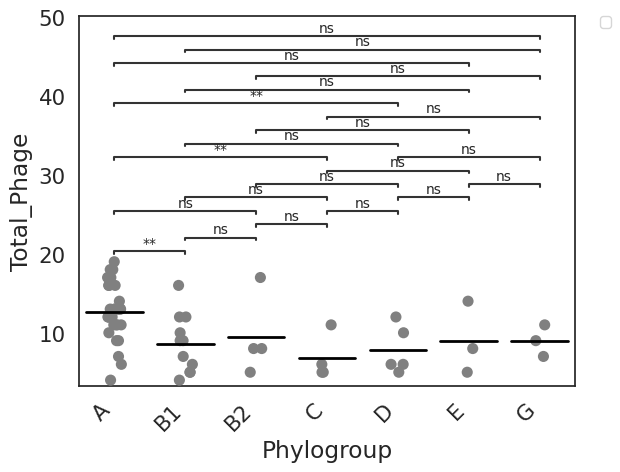

In [78]:
pairs = []

pairs2=[('A', 'B1'), ('A','B2'), ("A","C"), ("A", "D"), ("A", "E"), ("A", "G"), ("B1","B2"), ("B1", "C"), ("B1", "D"), ("B1", "E"), ("B1", "G"), ("B2", "C"), ("B2", "D"), ("B2", "E"), ("B2", "G"), ("C", "D"), ("C", "E"), ("C", "G"), ("D", "E"), ("D", "G"), ("E", "G")]

states_subcat =['A', 'B1', 'B2', 'C', 'D', 'E', 'G']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy_ANOVA_c, 'x': 'Phylogroup', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Phylogroup", y="Total_Phage", data= phispy_ANOVA_c, size=8, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Phylogroup",
            y="Total_Phage",
            data=phispy_ANOVA_c,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofphagevsphylogroupcecal.png", dpi = 400, bbox_inches= "tight")

/home/haley/miniconda3/envs/jupyter/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

F0012 vs. F0038: t-test independent samples, P_val:2.031e-02 t=-3.130e+00
F0038 vs. F0205: t-test independent samples, P_val:9.047e-02 t=1.925e+00
F0205 vs. F0731: t-test independent samples, P_val:4.176e-01 t=-8.547e-01
F0731 vs. F23315: t-test independent samples, P_val:1.147e-02 t=3.895e+00
F23315 vs. F2402: t-test independent samples, P_val:1.161e-01 t=2.000e+00
F2402 vs. F3862: t-test independent samples, P_val:2.302e-01 t=-1.366e+00
F3862 vs. F4957: t-test independent samples, P_val:1.188e-01 t=-1.777e+00
F4957 vs. F6041: t-test independent samples, P_val:1.633e-02 t=3.142e+00
F6041 vs. F6245: t-test independent samples, P_val:2.274e-02 t=-2.813e+00
F6245 vs. F7360: t-test independent samples, P_val:6.725e-01 t=-4.410e-01
F7360 vs. F8630: t-test independent samples, P_val:8.754e-01 t=-1.637e-01
F8630 v

F0038 vs. F9413: t-test independent samples, P_val:9.134e-01 t=-1.122e-01
F0205 vs. F9503: t-test independent samples, P_val:9.400e-01 t=7.770e-02
F0731 vs. F9619: t-test independent samples, P_val:6.430e-03 t=-3.431e+00
F0012 vs. F9413: t-test independent samples, P_val:5.521e-02 t=-2.242e+00
F0038 vs. F9503: t-test independent samples, P_val:6.920e-03 t=4.025e+00
F0205 vs. F9619: t-test independent samples, P_val:1.269e-03 t=-4.183e+00
F0012 vs. F9503: t-test independent samples, P_val:2.708e-01 t=-1.213e+00
F0038 vs. F9619: t-test independent samples, P_val:4.511e-02 t=-2.289e+00
F0012 vs. F9619: t-test independent samples, P_val:8.637e-04 t=-4.683e+00


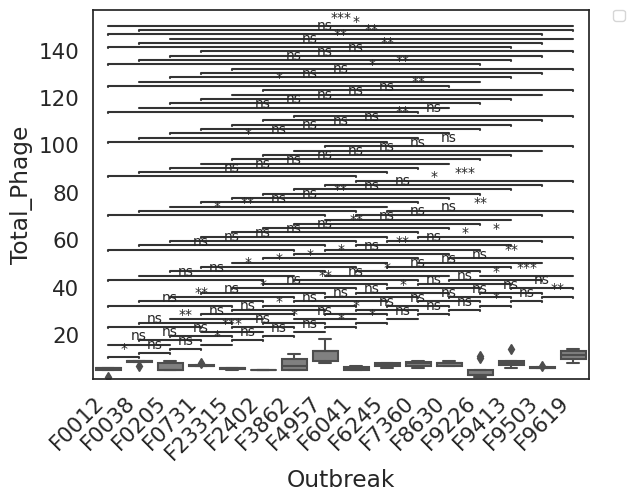

In [79]:
pairs = []

states_subcat =['F0012', 'F0038', 'F0205', 'F0731', 'F23315', 'F2402', 'F3862', 'F4957', 'F6041', 'F6245', 'F7360', 'F8630', 'F9226', 'F9413', 'F9503', 'F9619']
pairs2 = list(combinations(states_subcat, 2))
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': phispy_o_d, 'x': 'Outbreak', 'y': 'Total_Phage', "order": states_subcat, "palette": state_palette}
    ax = sns.boxplot(x="Outbreak", y="Total_Phage", data=phispy_o_d, order=states_subcat, palette=['grey'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
#sns.boxplot(showmeans=True,
            #meanline=False,
            #meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            #medianprops={'visible': False},
            #whiskerprops={'visible': False},
            #zorder=10,
            #x= "Outbreak",
            #y="Total_Plasmids",
            #data=mobsuiteSUM,
            #showfliers=False,
            #showbox=False,
            #showcaps=False,
            #order=states_subcat,
            #ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("07052023_EcoliARETE_sumofGIvsoutbreak_diseased.png", dpi = 400, bbox_inches= "tight")

In [80]:
#new BACMET heatmap made from crosstab

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import networkx as nx
import ete3
import dendropy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [83]:
#define colours
cmap = {
    #Outbreak
    'F2402': '#BEBEBE',
    'F9619': '#7FFFD4',
    'F6041': '#F0FFFF',
    'F9226': '#0000FF',
    'F9413': '#A52A2A',
    'F4957': '#DEB887',
    'F0012': '#7FFF00',
    'F8630': '#FF7F50',
    'F3862': '#FFF8DC',
    'F6245': '#00FFFF',
    'F7578': '#B8860B',
    'F2655': '#BDB76B',
    'F7360': '#8B008B',
    'F0731': '#556B2F',
    'F23315': '#FF8C00',
    'F4984': '#9932CC',
    'F9503': '#8B0000',
    'F0205': '#E9967A',
    'F0038':'#8FBC8F',
    #Source 
    'Diseased': '#FF0000',
    'Cecal': '#0000FF',
    'Environmental': '#00FF00',
    #Phylogroup
    'A':'#483D8B',
    'B1': '#2F4F4F',
    'B2': '#00CED1',
    'C': '#9400D3',
    'cryptic': '#000000',
    'D': '#FF1493',
    'E': '#00BFFF',
    'F': '#1E90FF',
    'G': '#B22222',
    'U': '#000000',
    np.nan: '#FFFFFF'
}

In [84]:
genome_labels = pd.read_table('/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/tree_heatmaps/genome_label.csv', sep=',', index_col=0)

In [85]:
genome_labels = genome_labels.reindex(columns=['Outbreak', 'Source', 'Phylogroup'])

In [86]:
genome_labels.index = genome_labels.index.str.replace('_',' ')

In [87]:
source = {k:v for k, v in cmap.items() if k in genome_labels['Source'].unique()}
outbreak = {k:v for k, v in cmap.items() if k in genome_labels['Outbreak'].unique()}
phylo = {k:v for k, v in cmap.items() if k in genome_labels['Phylogroup'].unique()}

In [88]:
t = ete3.Tree('/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/panaroo_results/results/tree_Ecoli/Ecoli_tree_file_gtr_gamma.treefile', format= 1)
t.set_outgroup('EF')
tree = dendropy.Tree.get(data=t.write(), schema='newick')
dm =pd.DataFrame.from_records(tree.phylogenetic_distance_matrix().as_data_table()._data)
um = squareform(dm[dm.index])
ultrametric_link = linkage(um)

In [89]:
genome_colors = genome_labels.copy()

for col in genome_colors.columns:
    genome_colors[col] = [cmap[c] for c in genome_colors[col]]
    
legend_keys = []
for i, col in enumerate(genome_labels.columns):
    legend_keys += sorted(list(genome_labels[col].dropna().unique()))
legend_cmap = {k:v for k, v in cmap.items() if k in legend_keys}

pa_cmap= sns.color_palette(['#f5f5f5', '#021657'])

In [99]:
Ppa = pd.read_csv("/media/haley/My Book1/Ecoli_results/Ecoli_ARETE_Results_Organized/VIDO_ARETE/06302023_EcoliARETE_BACMET_crosstab_gene_name.csv")

In [108]:

Ppa.loc['EF'] = pd.Series(dtype=float)
Ppa3 = Ppa.fillna(0)
#Ppa3.index = Ppa3.index.astype(str).str.replace('-', ' ')
#Ppa3.index = Ppa3.index.astype(str).str.rstrip('.gbk')
Ppa4 = Ppa3.drop('All', axis=1)
Ppa5 = Ppa4.iloc[:-2]
Ppa6 = Ppa5.reset_index()
Ppa6["row_0"] = Ppa6["row_0"].str.replace('_',' ')
Ppa7 = Ppa6.set_index("row_0")
Ppa8 = Ppa7.ge(0.5).astype(int)
for genome in set(dm.index) - set(Ppa8.index):
    Ppa8.loc[genome]=0

col_sums = Ppa8.sum()
mask = col_sums >= 10
Ppa9 = Ppa8.loc[:, mask]

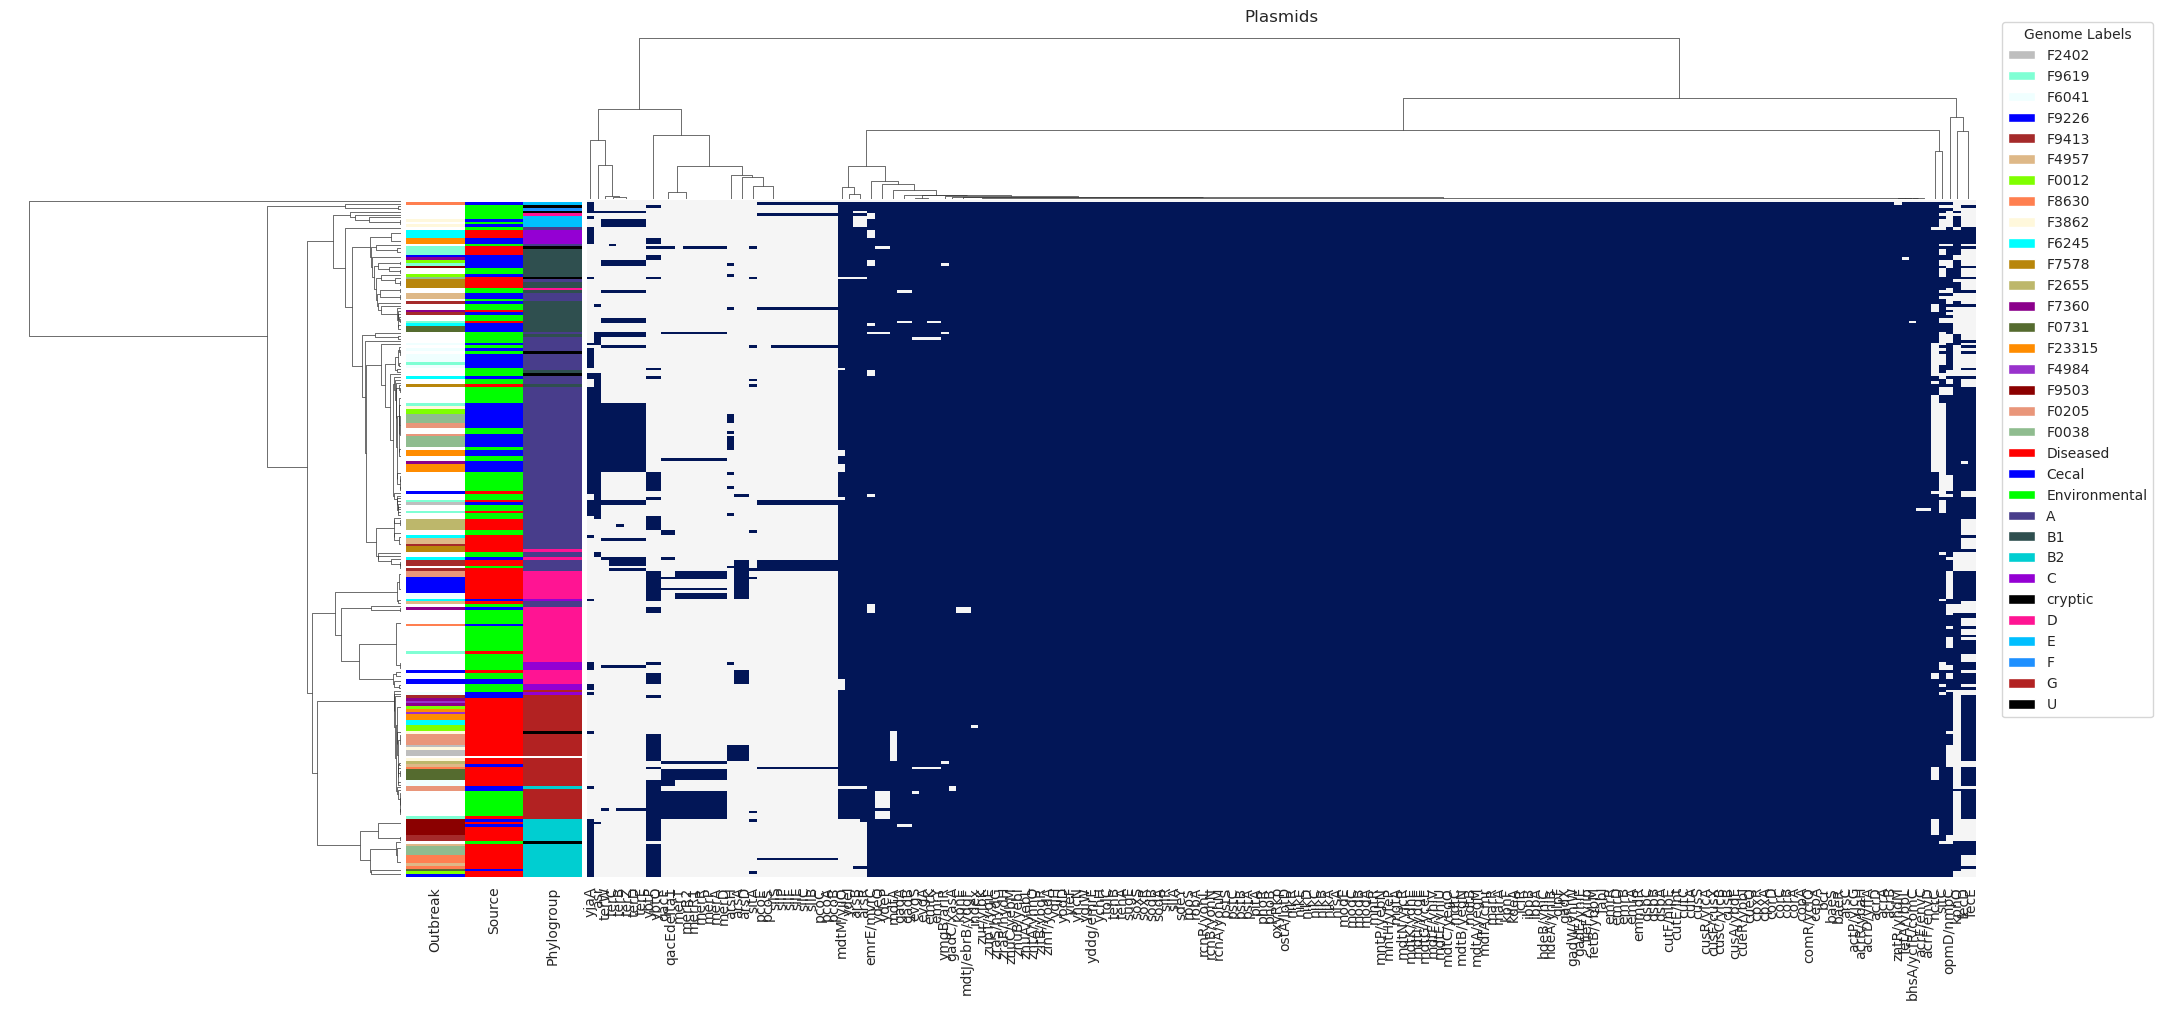

In [111]:
feature = 'Plasmids'
panel = 'a'
#sel = type_counts[(type_counts['Feature Type']==feature) & (type_counts['Count'] >=5)]
#sel = type_counts[(type_counts['Feature Type']==feature)]
sel_pa = Ppa9


#total = type_counts[type_counts['Feature Type'] == feature].shape[0]
#lt5 = type_counts[(type_counts['Count']<5) & (type_counts['Feature Type']==feature)].shape[0]
#gt5 = total - lt5
#title = "{0} ({1}/{2})".format(feature, gt5, total)
title = feature
###########################################
#plot
handles = [Patch(facecolor=legend_cmap[name]) for name in legend_cmap]
g = sns.clustermap(data=sel_pa.loc[dm.index], 
                   row_linkage=ultrametric_link, 
                   method='complete', metric='cityblock',
                   cbar_pos=None, row_colors=genome_colors,
                   cmap=pa_cmap, 
                   xticklabels=1, yticklabels=False,
                   figsize=(20,10))
g.ax_col_dendrogram.set_title(title)
plt.legend(handles, legend_cmap, title='Genome Labels',
bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper left')
plt.savefig('07052023_bacmetexp_clustergram.png'.format(panel, feature), bbox_inches='tight', dpi=300)